In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [2]:
df = pd.read_csv('data.csv', sep=",", encoding="ISO-8859-1", header=0)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [5]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [6]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [8]:
res_df = new_df.groupby(['CustomerID']).sum()
res_df.sort_values('TotalAmount',ascending=False,inplace=True)
final_df = res_df[(res_df['Quantity'] > 0) & (res_df['TotalAmount'] > 0)]

print('customer Id {} who paid the maximum amount {}'.format(int(final_df['TotalAmount'].argmax()),final_df['TotalAmount'].max()))
print('customer Id {} who paid the minimum amount {}'.format(int(final_df['TotalAmount'].argmin()),final_df['TotalAmount'].min()))

final_df.head(10)

customer Id 0 who paid the maximum amount 279489.0199999999
customer Id 4314 who paid the minimum amount 2.8999999999941792


,Quantity,TotalAmount
CustomerID,,
14646.0,196719,279489.02
18102.0,64122,256438.49
17450.0,69029,187482.17
14911.0,77180,132572.62
12415.0,77242,123725.45
14156.0,57025,113384.14
17511.0,63012,88125.38
16684.0,49390,65892.08
13694.0,61803,62653.10


In [9]:
# total sales at each country, how many quantites sold at each country 
country_df = new_df.groupby(['Country']).sum()
country_df.sort_values('TotalAmount',ascending=False,inplace=True)
country_df.drop('CustomerID',axis=1,inplace=True)
country_df.head()

,Quantity,TotalAmount
Country,,
United Kingdom,4263829,8.187806e+06
Netherlands,200128,2.846615e+05
EIRE,142637,2.632768e+05
Germany,117448,2.216982e+05
France,110480,1.974039e+05


In [10]:
print('The minimum number of products has been bought is {} by customer id {} '.format(final_df['Quantity'].min(),final_df['Quantity'].argmin()))
print('The maximum number of products has been bought is {} by customer id {} '.format(final_df['Quantity'].max(),final_df['Quantity'].argmax()))
new_df.groupby('Country').mean()

The minimum number of products has been bought is 1 by customer id 858 
The maximum number of products has been bought is 196719 by customer id 0 


,CustomerID,Quantity,TotalAmount
Country,,,
Australia,12464.656076,66.444003,108.877895
Austria,12521.451372,12.037406,25.322494
Bahrain,12354.529412,13.684211,28.863158
Belgium,12430.298695,11.189947,19.773301
Brazil,12769.000000,11.125000,35.737500
Canada,17321.079470,18.298013,24.280662
Channel Islands,14888.151715,12.505277,26.499063
Cyprus,12404.951768,10.155949,20.813971
Czech Republic,12781.000000,19.733333,23.590667


In [14]:
## Average of amount paid by the customers overall countries
y['TotalAmount'].sum() / y['Quantity'].sum()

1.883095158651216

Text(0.5, 0, 'Country')

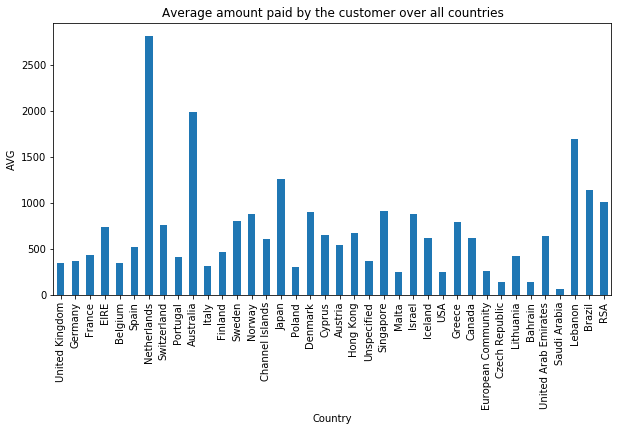

In [15]:
y['AVG'].plot(kind='bar',figsize=(10,5),title='Average amount paid by the customer over all countries')
plt.ylabel('AVG')
plt.xlabel('Country')

In [17]:
## Total sales for each product

df_1=df[['StockCode','Description','Quantity','TotalAmount','Country','InvoiceDate']]
product_totalsales_df = df_1.groupby(['Country','StockCode','Description']).sum()
product_totalsales_df = product_totalsales_df[ (product_totalsales_df['Quantity'] > 0) & (product_totalsales_df['TotalAmount'] >0) ]
product_totalsales_df = product_totalsales_df[product_totalsales_df['TotalAmount'] >= 1000 ]

product_totalsales_df.sort_values('TotalAmount',ascending=False)

Quantity  \
Country        StockCode Description                                     
United Kingdom DOT       DOTCOM POSTAGE                            707   
               22423     REGENCY CAKESTAND 3 TIER                10376   
               47566     PARTY BUNTING                           16709   
               85123A    WHITE HANGING HEART T-LIGHT HOLDER      32901   
               85099B    JUMBO BAG RED RETROSPOT                 43167   
...                                                                ...   
               22755     SMALL PURPLE BABUSHKA NOTEBOOK           1315   
               21464     DISCO BALL ROTATOR BATTERY OPERATED       237   
               22915     ASSORTED BOTTLE TOP  MAGNETS             2174   
               21824     PAINTED METAL STAR WITH HOLLY BELLS      1725   
               23469     CARD HOLDER LOVE BIRD SMALL               232   

                                                              TotalAmount  
Country        StockCode Description                                       
United Kingdom DOT       DOTCOM POSTAGE                         206245.48  
               22423     REGENCY CAKESTAND 3 TIER               134405.94  
               47566     PARTY BUNTING                           92501.73  
               85123A    WHITE HANGING HEART T-LIGHT HOLDER      92000.59  
               85099B    JUMBO BAG RED RETROSPOT                 84516.44  
...                                                                   ...  
               22755     SMALL PURPLE BABUSHKA NOTEBOOK           1004.64  
               21464     DISCO BALL ROTATOR BATTERY OPERATED      1004.25  
               22915     ASSORTED BOTTLE TOP  MAGNETS             1002.86  
               21824     PAINTED METAL STAR WITH HOLLY BELLS      1002.49  
               23469     CARD HOLDER LOVE BIRD SMALL              1002.16  

[1669 rows x 2 columns]

In [18]:
## Sales Average of each product overall countries 

Avgsales_product = df_1.groupby(['StockCode','Description']).mean()

Avgsales_product = Avgsales_product[ (Avgsales_product['Quantity'] > 0) & (Avgsales_product['TotalAmount'] >0) ]
Avgsales_product = Avgsales_product[Avgsales_product['TotalAmount'] >= 100 ]

Avgsales_product.sort_values('TotalAmount',ascending=False)

,,Quantity,TotalAmount
StockCode,Description,,
22502,PICNIC BASKET WICKER 60 PIECES,30.500000,19809.750000
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
23131,MISELTOE HEART WREATH CREAM,240.000000,996.000000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
22275,WEEKEND BAG VINTAGE ROSE PAISLEY,69.000000,527.850000
22833,HALL CABINET WITH 3 DRAWERS,15.200000,520.706000
22830,UTILTY CABINET WITH HOOKS,21.833333,435.048333
21897,POTTING SHED CANDLE CITRONELLA,135.000000,422.730000
21769,VINTAGE POST OFFICE CABINET,5.500000,303.825000


In [19]:
## total sales for each product at each country

Total_sales_product = df_1.groupby(['Country','StockCode']).sum()

Total_sales_product = Total_sales_product[ (Total_sales_product['Quantity'] > 0) & (Total_sales_product['TotalAmount'] >0) ]
Total_sales_product = Total_sales_product[Total_sales_product['TotalAmount'] >= 100 ]

Total_sales_product15036	600	432.00
16161P	400	136

Quantity  TotalAmount
Country        StockCode                          
Australia      15036              600       432.00
               16161P             400       136.00
               20675              216       228.96
               20676              216       228.96
               20677              216       228.96
...                               ...          ...
United Kingdom DOT               1707    206245.48
               gift_0001_20        20       167.05
               gift_0001_30        37       175.53
               gift_0001_40         3       100.70
               gift_0001_50         4       167.56

[6050 rows x 2 columns]

In [20]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

CustomerID     24.93
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
UnitPrice       0.00
TotalAmount     0.00
Description     0.27
InvoiceDate     0.00
Country         0.00
dtype: float64

In [21]:
df = df.dropna()
df.shape

(406829, 9)

In [22]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [23]:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [25]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [27]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [28]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Amount,Diff
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,15.30,373 days 04:24:00
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,20.34,373 days 04:24:00
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,22.00,373 days 04:24:00
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,20.34,373 days 04:24:00
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,20.34,373 days 04:24:00


In [29]:
rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [30]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [31]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

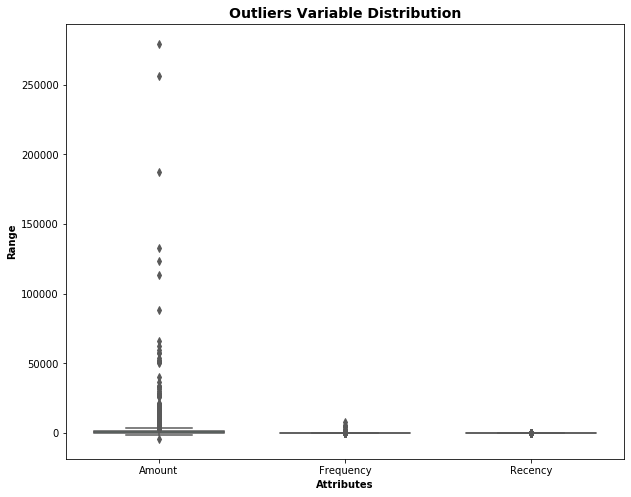

In [32]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [33]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [34]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [35]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [36]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_

array([2, 3, 1, ..., 2, 1, 1], dtype=int32)

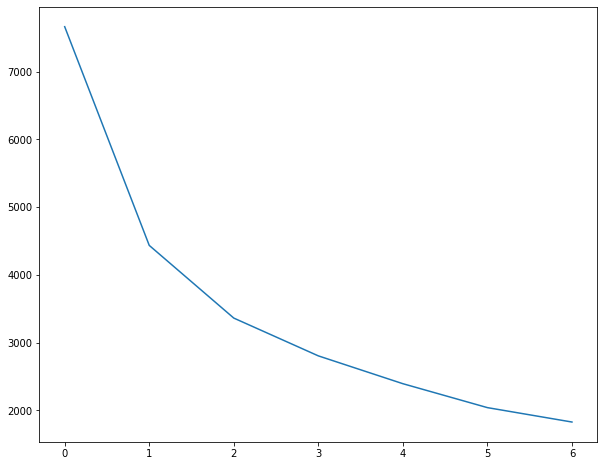

In [38]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

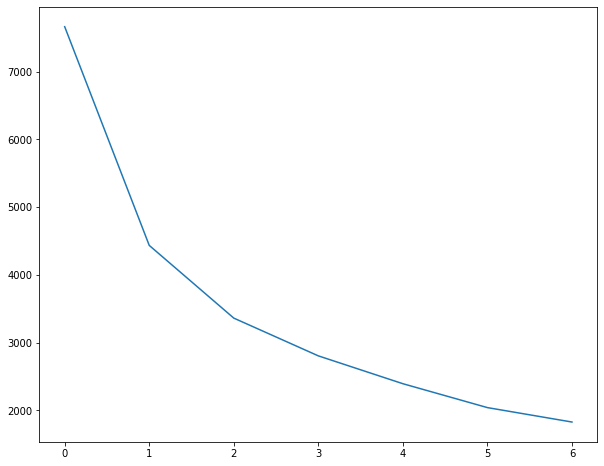

In [39]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [40]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
 kmeans.labels_


array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [42]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


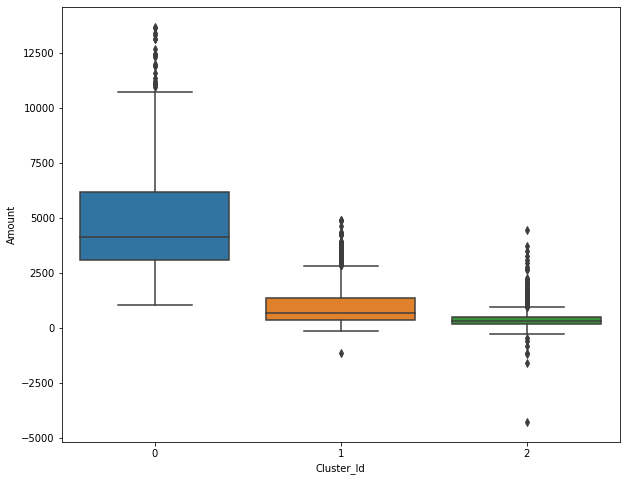

In [43]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

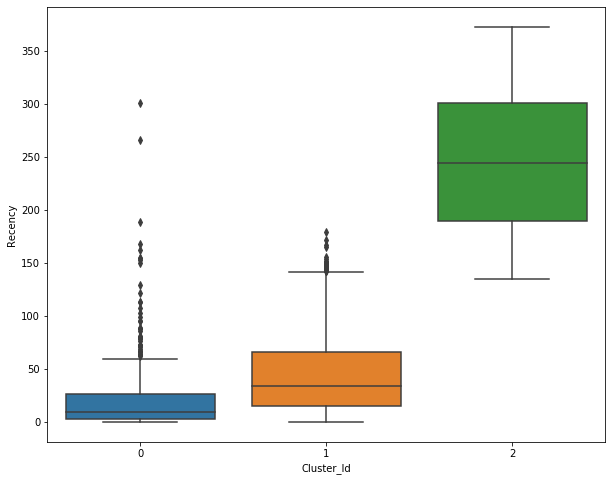

In [44]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to                             other customers.
Customers with Cluster Id 1 are frequent buyers.
Customers with Cluster Id 2 are not recent buyers and hence least of importance from business                             point of view.